# Import the libararies

In [86]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
from numpy import log
from pandas import Series
from datetime import datetime

In [87]:
# import dataset
dataset = pd.read_csv("international-airline-passengers.csv")

In [88]:
dataset

,Month,Thousands of passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [89]:
# Actual format required - YYYY-MM-DD but data is given only in format YYYY-MM
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.head()

,Month,Thousands of passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [90]:
dataset.isna().sum()

Month                      0
Thousands of passengers    0
dtype: int64

In [91]:
dataset['Month'].dtype

dtype('<M8[ns]')

In [92]:
# We have to make time variable to index
dataset.set_index('Month',inplace = True)
dataset.head()

,Thousands of passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

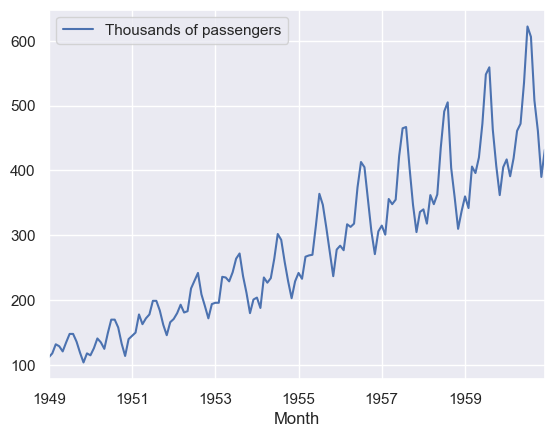

In [93]:
dataset.plot()

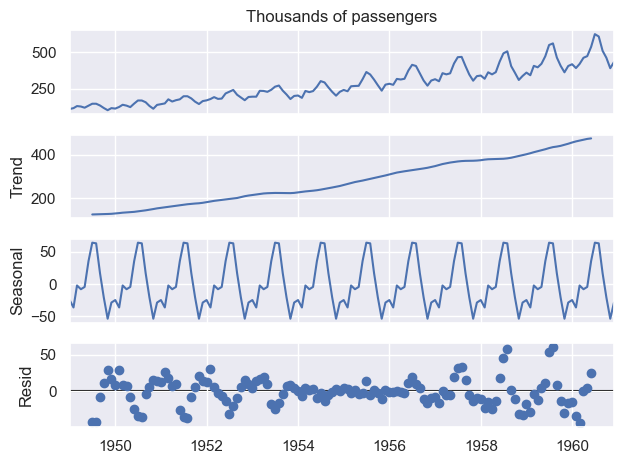

In [94]:
# Decompose the dataset to check what all component we have

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of passengers'], period = 12)
decomposition.plot()
plt.show()

In [95]:
dataset.isna().sum()

Thousands of passengers    0
dtype: int64

In [96]:
# We do have upward trend and seasonality in our dataset
# Now we have to check whether data is stationary or non-stationary
# We can perform time series forecasting only when data is stationary

# Augmented Decay Fuller test - To check wether data is Stationary or not

In [97]:
from statsmodels.tsa.stattools import adfuller

In [98]:
adfuller(dataset['Thousands of passengers'])

(np.float64(0.8153688792060482),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [99]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("Augmented decay fuller test - Stationary or Non-Stationary")
    labels = ['ADF Fuller test' , 'p -value', '#Lags', 'No.of Obs']

    for i, j in zip(result,labels):
        print(j + " " + str(i))
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak evidence against null hypothesis and my time series is non Stationary")

In [100]:
adf_check(dataset['Thousands of passengers'])

Augmented decay fuller test - Stationary or Non-Stationary
ADF Fuller test 0.8153688792060482
p -value 0.991880243437641
#Lags 13
No.of Obs 130
Weak evidence against null hypothesis and my time series is non Stationary


In [101]:
# Since my data is non stationary,we have to use lag method to make sure data would be in a stationary format
dataset['1st Difference'] = dataset['Thousands of passengers'] - dataset['Thousands of passengers'].shift(1)

In [102]:
dataset.head(10)

,Thousands of passengers,1st Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
1949-07-01,148,13.0
1949-08-01,148,0.0
1949-09-01,136,-12.0


In [103]:
adf_check(dataset['1st Difference'].dropna())

Augmented decay fuller test - Stationary or Non-Stationary
ADF Fuller test -2.8292668241699994
p -value 0.0542132902838255
#Lags 12
No.of Obs 130
Weak evidence against null hypothesis and my time series is non Stationary


In [104]:
dataset['2nd Difference'] = dataset['1st Difference'] - dataset['1st Difference'].shift(1)

In [105]:
dataset.head()

,Thousands of passengers,1st Difference,2nd Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [106]:
adf_check(dataset['2nd Difference'].dropna())

Augmented decay fuller test - Stationary or Non-Stationary
ADF Fuller test -16.384231542468505
p -value 2.7328918500142407e-29
#Lags 11
No.of Obs 130
Strong evidence against null hypothesis and my time series is Stationary


In [107]:
# seasonality
dataset['seasonality'] =  dataset['Thousands of passengers'] - dataset['Thousands of passengers'].shift(12)

In [108]:
dataset.head(20)

,Thousands of passengers,1st Difference,2nd Difference,seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [109]:
adf_check(dataset['seasonality'].dropna())

Augmented decay fuller test - Stationary or Non-Stationary
ADF Fuller test -3.383020726492481
p -value 0.011551493085514954
#Lags 1
No.of Obs 130
Strong evidence against null hypothesis and my time series is Stationary


## Trend - pdq
## Seasonality - PQD
## p or P - partial auto correlation(Auto Regressive method)
## q or Q - Auto correlation(Moving average)
## d or D - difference (integrated method) - lag function
## d - difference - 2(Trend)
## D - difference - 1(Seasonality)

In [110]:
# Find p/q and P/Q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [111]:
# finding q (trend)

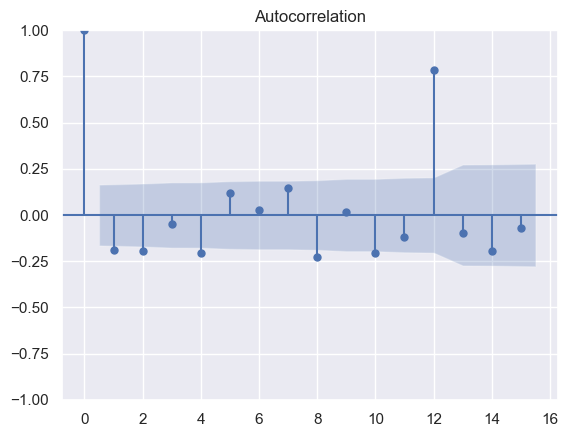

In [112]:
plot_acf(dataset['2nd Difference'].dropna(),lags = 15)
plt.show()

In [113]:
# Find Q (Seasonality) - 5

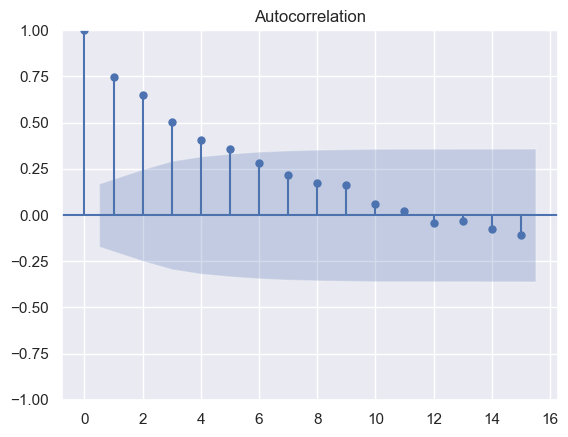

In [114]:
plot_acf(dataset['seasonality'].dropna(),lags = 15)
plt.show()

In [115]:
# P - Seasonality - 2

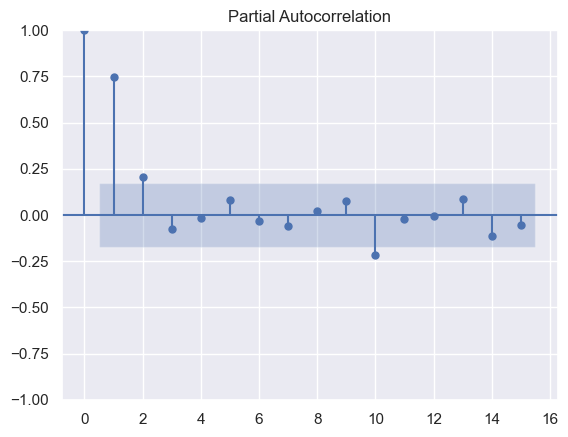

In [116]:
plot_pacf(dataset['seasonality'].dropna(),lags = 15)
plt.show()

# Building time series forecasting model basis parameters values

In [117]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [118]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of passengers'],
                                  order = (4,2,2) , seasonal_order = (2,1,1,12))

In [119]:
result = model.fit()

In [120]:
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:              Thousands of passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -497.783
Date:                              Mon, 19 Jan 2026   AIC                           1015.566
Time:                                      14:28:57   BIC                           1044.241
Sample:                                  01-01-1949   HQIC                          1027.218
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3589      0.097    -14.026      0.000      -1.549      -1.169
ar.L2         -0.49

# Auto Arima model

In [121]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [122]:
import itertools
p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]

print("Check how the parameters work basis pdq combination")
print('{} x {}'.format(pdq[0], seasonal_pdq[0]))
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Check how the parameters work basis pdq combination
(0, 0, 0) x (0, 0, 0, 12)
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [123]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(dataset['Thousands of passengers'],
                                  order = param , seasonal_order = param_seasonal,
                                     enforce_stationary = False,
                                         enforce_invertibility = False)
            result = model.fit()
            print('ARIMA {}X{} - AIC:{}'.format(param , param_seasonal, result.aic))
        except Exception as e:
            print("Error:" ,e)
            continue

ARIMA (0, 0, 0)X(0, 0, 0, 12) - AIC:2057.8473380286773
ARIMA (0, 0, 0)X(0, 0, 1, 12) - AIC:2061.7339541382626
ARIMA (0, 0, 0)X(0, 1, 0, 12) - AIC:1324.95414143452
ARIMA (0, 0, 0)X(0, 1, 1, 12) - AIC:1274.612580845599
ARIMA (0, 0, 0)X(1, 0, 0, 12) - AIC:1501.3197636038049
ARIMA (0, 0, 0)X(1, 0, 1, 12) - AIC:1451.3003771072094
ARIMA (0, 0, 0)X(1, 1, 0, 12) - AIC:1221.243026167805
ARIMA (0, 0, 0)X(1, 1, 1, 12) - AIC:1176.9819617435655
ARIMA (0, 0, 1)X(0, 0, 0, 12) - AIC:1870.3044051429947
ARIMA (0, 0, 1)X(0, 0, 1, 12) - AIC:1723.551703153018
ARIMA (0, 0, 1)X(0, 1, 0, 12) - AIC:1214.0663079123387
ARIMA (0, 0, 1)X(0, 1, 1, 12) - AIC:1189.8271589748124
ARIMA (0, 0, 1)X(1, 0, 0, 12) - AIC:1376.5969876160063
ARIMA (0, 0, 1)X(1, 0, 1, 12) - AIC:1413.3030498701496
ARIMA (0, 0, 1)X(1, 1, 0, 12) - AIC:1161.8395483082159
ARIMA (0, 0, 1)X(1, 1, 1, 12) - AIC:1120.201221129264
ARIMA (0, 1, 0)X(0, 0, 0, 12) - AIC:1413.9091174789412
ARIMA (0, 1, 0)X(0, 0, 1, 12) - AIC:1302.6902706270762
ARIMA (0, 1, 0)X

In [124]:
#ARIMA (0, 1, 1)X(1, 1, 1, 12) - AIC:1020.3273501278601

In [125]:
len(dataset)

144

In [126]:
dataset.head()

,Thousands of passengers,1st Difference,2nd Difference,seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


In [140]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of passengers'],
                                  order = (0,1,1) , seasonal_order = (1, 1, 1, 12))

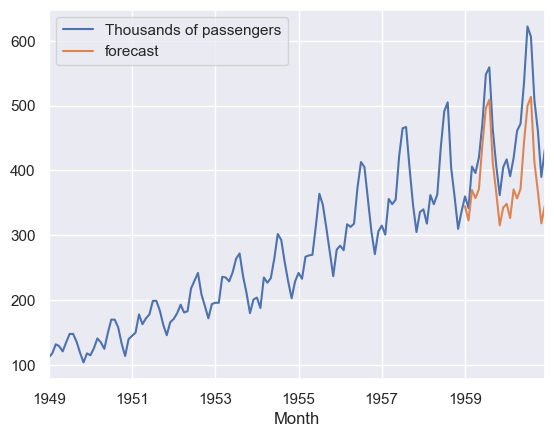

In [142]:
dataset['forecast']=result.predict(start = 120 , end = 144 , dynamic = True)
dataset[['Thousands of passengers', 'forecast']].plot()
plt.show()

In [146]:
# Predict 5 years passanger details(1961 to 1965-12-01)
from pandas.tseries.offsets import DateOffset

In [147]:
dataset.tail()

,Thousands of passengers,1st Difference,2nd Difference,seasonality,forecast
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,513.446037
1960-09-01,508,-98.0,-82.0,45.0,412.721551
1960-10-01,461,-47.0,51.0,54.0,367.621002
1960-11-01,390,-71.0,-24.0,28.0,318.544254
1960-12-01,432,42.0,113.0,27.0,345.572709


In [150]:
future_dates = [dataset.index[-1] + DateOffset(months=x) for x in range(0,61)]

In [151]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [152]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns = dataset.columns)

In [153]:
future_dates_df.tail()

,Thousands of passengers,1st Difference,2nd Difference,seasonality,forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


In [154]:
future_dates_df.head()

,Thousands of passengers,1st Difference,2nd Difference,seasonality,forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN


In [156]:
final_df = pd.concat([dataset, future_dates_df])

In [157]:
final_df.head()

,Thousands of passengers,1st Difference,2nd Difference,seasonality,forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


In [158]:
final_df.tail()

,Thousands of passengers,1st Difference,2nd Difference,seasonality,forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


In [159]:
len(final_df)

204

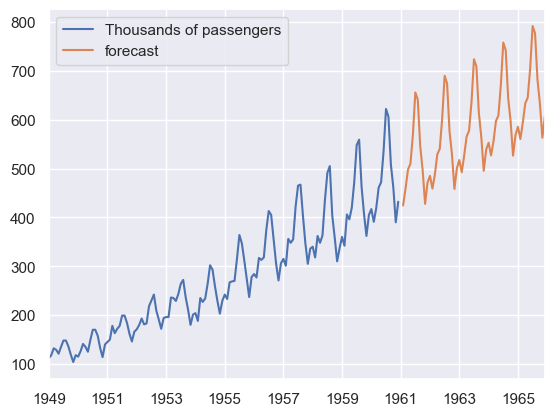

In [160]:
final_df['forecast'] = result.predict(start = 145 , end = 204 , dynamic = True)
final_df[['Thousands of passengers', 'forecast']].plot()
plt.show()

In [162]:
final_df.tail(60)

,Thousands of passengers,1st Difference,2nd Difference,seasonality,forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,424.388986
1961-03-01,NaN,NaN,NaN,NaN,459.041256
1961-04-01,NaN,NaN,NaN,NaN,497.866983
1961-05-01,NaN,NaN,NaN,NaN,509.866618
1961-06-01,NaN,NaN,NaN,NaN,568.261950
1961-07-01,NaN,NaN,NaN,NaN,655.813832
1961-08-01,NaN,NaN,NaN,NaN,641.197185
1961-09-01,NaN,NaN,NaN,NaN,546.400875
1961-10-01,NaN,NaN,NaN,NaN,496.806504


In [163]:
final_df.head(60)

,Thousands of passengers,1st Difference,2nd Difference,seasonality,forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
1949-06-01,135,14.0,22.0,NaN,NaN
1949-07-01,148,13.0,-1.0,NaN,NaN
1949-08-01,148,0.0,-13.0,NaN,NaN
1949-09-01,136,-12.0,-12.0,NaN,NaN
1949-10-01,119,-17.0,-5.0,NaN,NaN


# The End